# 1- Librerias y config

probbando probando

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import re

pd.set_option('display.max_columns', None)

sys.path.append('./../')
import config
from utils import tools
from data_analysis import analysis_utils

In [2]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] 
mpl.rcParams['text.usetex'] = False

# 2. Processor

In [3]:
class DataProcessor:
    def __init__(self):
        self.dos_csv_path = config.DOS_CSV_PATH
        self.supercon_csv_path = config.SUPERCON_CSV_PATH

    def read_supercon_database(self):
        self.supercon_data = pd.read_csv(self.supercon_csv_path, skiprows=1)
        self.supercon_data.columns = ['chemical_formula', 'critical_temperature_k', 'ICSD', 'synth_doped']
        self.supercon_data['ICSD'] = self.supercon_data['ICSD'].str.replace('ICSD-', '')

    def read_materials_csv(self):
        self.materials_data = pd.read_csv(self.dos_csv_path)
        self.ICSD_preprocessor()
        self.identify_superconductors()

    def ICSD_preprocessor(self):
        self.materials_data['ICSD'] = pd.to_numeric(self.materials_data['ICSD'], errors='coerce').astype('Int64')
        num_nulos = self.materials_data['ICSD'].isnull().sum()
        len_df_pre = len(self.materials_data)
        print(f"{num_nulos} rows ({num_nulos/len_df_pre*100:.4f} %) where dropped because of null on ICSD.")
        self.materials_data.dropna(subset=['ICSD'], inplace=True)

    def identify_superconductors(self):
        ICSD_supercon = self.supercon_data.ICSD.unique().astype(int).tolist()
        self.materials_data.insert(5, 'is_superconductor', self.materials_data.ICSD.isin(ICSD_supercon))

    def processor(self):
        self.read_supercon_database()
        self.read_materials_csv()
        return self.materials_data, self.supercon_data


MaterialsProcessor = DataProcessor()
materials_data, supercon_data = MaterialsProcessor.processor()

C:\Users\OlayaFolgueiras\AppData\Local\Temp\ipykernel_2852\2883198947.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  self.materials_data = pd.read_csv(self.dos_csv_path)


1 rows (0.0017 %) where dropped because of null on ICSD.


In [4]:
materials_data.head()

bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0             BCC      Ag1F6Sb1   28676      -2.03066        False   
1             BCC      Ag1F6Sb1  411795      -2.03253        False   
2             BCC        Ag1Te3   37186       5.57824        False   
3             BCC     Ag3Au1Se2   15734       2.21332        False   
4             BCC     Ag3Au1Se2  171959       2.22832        False   

   is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0              False         0.0         0.0         0.0         0.0   
1              False         0.0         0.0         0.0         0.0   
2              False         0.0         0.0         0.0         0.0   
3              False         0.0         0.0         0.0         0.0   
4              False         0.0         0.0         0.0         0.0   

   DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_67  DOS_m14_65  DOS_m14_64  DOS_m14_62  DOS_m14_61  DOS_m14_59  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_58  DOS_m14_56  DOS_m14_55  DOS_m14_53  DOS_m14_52  DOS_m14_50  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_49  DOS_m14_47  DOS_m14_46  DOS_m14_44  DOS_m14_43  DOS_m14_41  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_40  DOS_m14_38  DOS_m14_37  DOS_m14_35  DOS_m14_34  DOS_m14_32  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0 

# 3. EDA

2024-06-15 16:56:28: · MODULE: StatsReporter...


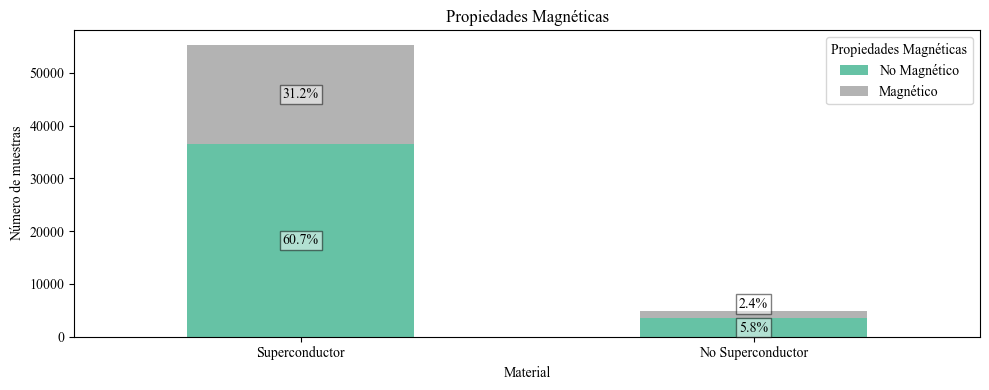

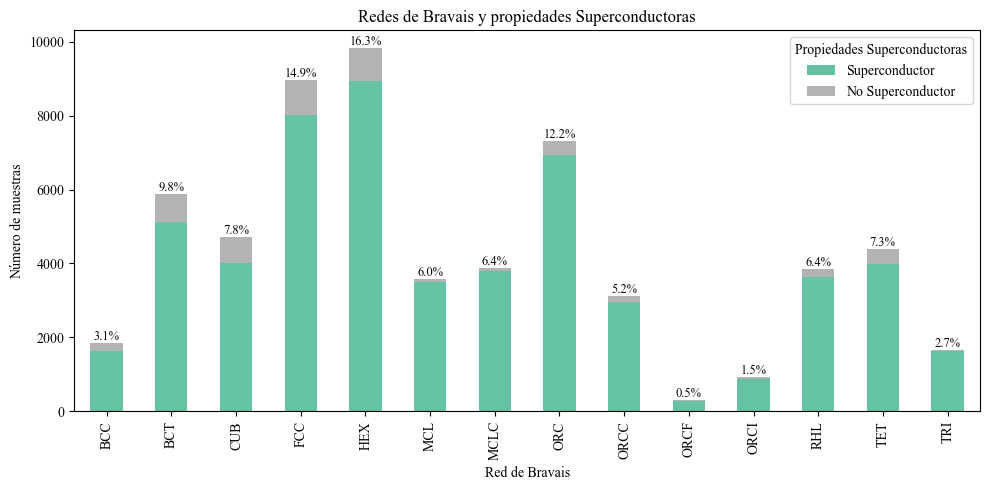

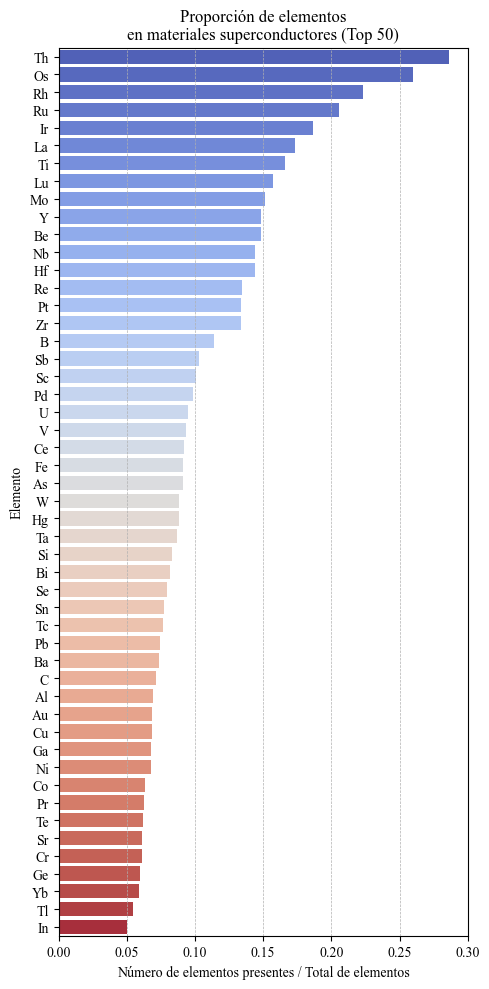

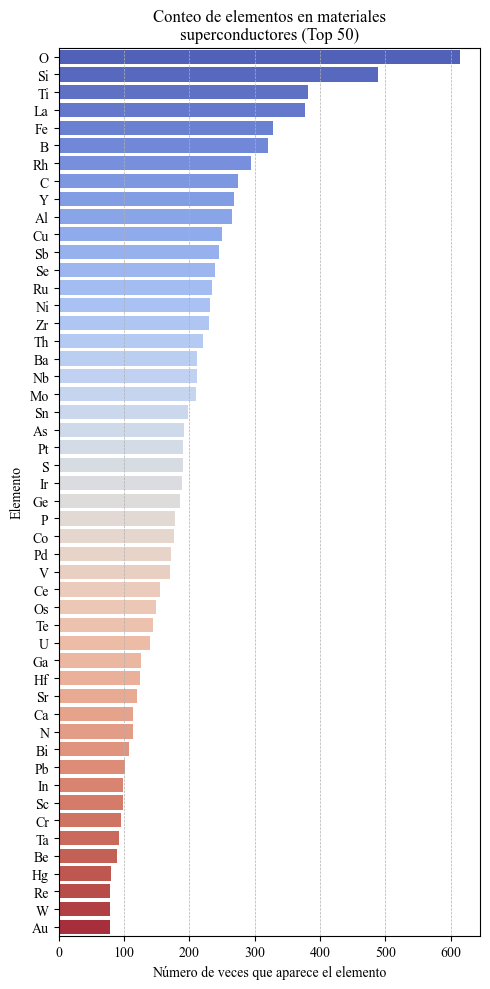

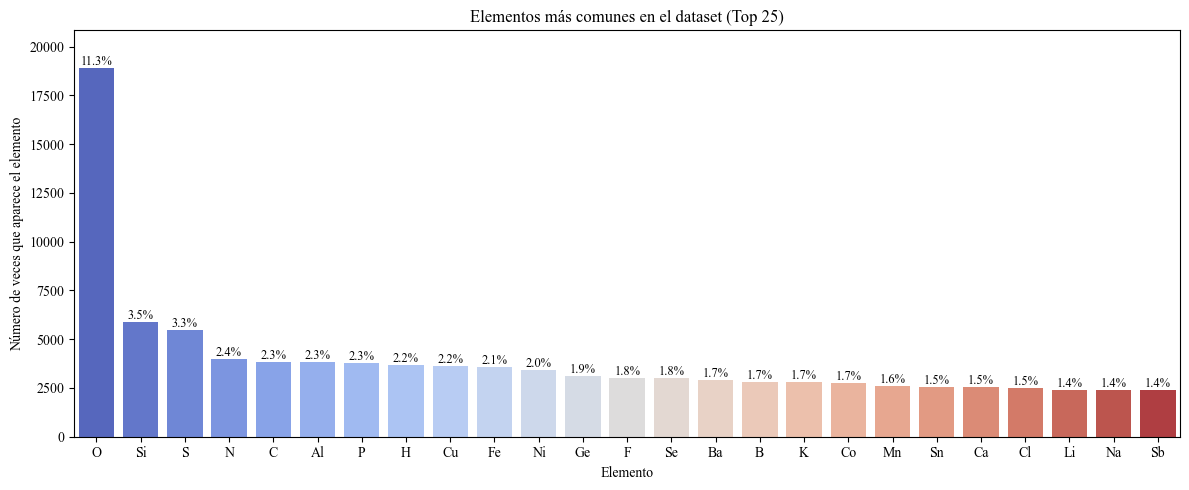

In [5]:
class StatsReporter:
    def __init__(self, materials_data, run_results_path):
        self.materials_data = materials_data
        self.run_results_path = run_results_path
        tools.log_main('· MODULE: StatsReporter...', save_path=self.run_results_path)

    def _calculate_stats(self, column_name):
        """Calculates and returns statistics for a given column."""
        value_counts = self.materials_data[column_name].value_counts()
        total_count = len(self.materials_data[column_name])
        true_count = value_counts.get(True, 0)
        true_percentage = (true_count / total_count) * 100
        return true_percentage, total_count, true_count

    def superconductors_stats(self, report_file):
        """Calculates and writes superconductor statistics to a report file."""
        true_percentage, total_count, true_count = self._calculate_stats('is_superconductor')
        tools.write_to_report(report_file, f"\n--- Superconductors ---\n")
        tools.write_to_report(report_file, f"Percentage of superconductors: {true_percentage:.2f}%\n")
        tools.write_to_report(report_file, f'Total materials: {total_count}\n')
        tools.write_to_report(report_file, f'Superconducting materials: {true_count}\n')

    def magnetic_stats(self, report_file):
        """Calculates and writes magnetic statistics to a report file."""
        true_percentage, total_count, true_count = self._calculate_stats('is_magnetic')
        tools.write_to_report(report_file, f"\n--- Magnetic properties ---\n")
        tools.write_to_report(report_file, f'Total materials: {total_count}\n')
        tools.write_to_report(report_file, f'Magnetic materials: {true_count}\n')

    def element_stats(self, report_file):
        """Calculates and writes element statistics to the report."""
        df = self.materials_data[['material_name', 'is_superconductor']].copy()
        df = analysis_utils.extract_elements_from_dataframe(df)
        element_df = analysis_utils.create_element_dataframe(df)

        total_elements = len(element_df['element'].unique())

        superconductor_elements = element_df[element_df['is_superconductor'] == True]['element'].unique()
        num_superconductor_elements = len(superconductor_elements)
        percentage_superconductor_elements = (num_superconductor_elements / total_elements) * 100

        nonsuperconductor_elements = element_df[element_df['is_superconductor'] == False]['element'].unique()
        num_nonsuperconductor_elements = len(nonsuperconductor_elements)
        percentage_nonsuperconductor_elements = (num_nonsuperconductor_elements / total_elements) * 100

        tools.write_to_report(report_file, f"\n--- Estadísticas de Elementos ---\n")
        tools.write_to_report(report_file, f"Número total de elementos únicos: {total_elements}\n")
        tools.write_to_report(report_file, f"Número de elementos en superconductores: {num_superconductor_elements} ({percentage_superconductor_elements:.2f}%)\n")
        tools.write_to_report(report_file, f"Número de elementos en NO superconductores: {num_nonsuperconductor_elements} ({percentage_nonsuperconductor_elements:.2f}%)\n")

    def stats_report(self):
        """Writes the complete statistics report to a file."""
        report_file = os.path.join(self.run_results_path, 'stats_report.txt')
        if not os.path.exists(report_file):
            tools.write_to_report(report_file, f'·········· STATISTICS ··········\n')
        self.superconductors_stats(report_file)
        self.magnetic_stats(report_file)
        self.element_stats(report_file)

class Plotter:
    def __init__(self, materials_data, run_results_path):
        self.materials_data = materials_data
        self.run_results_path = run_results_path

    def magnetic_properties_plot(self):
        grouped_data = self.materials_data.groupby(['is_superconductor', 'is_magnetic']).size()
        ax = grouped_data.unstack().plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,4))
        tools.stack_plot_percentages_labels(ax, grouped_data)
        plt.title('Propiedades Magnéticas')
        plt.xlabel('Material')
        plt.ylabel('Número de muestras')
        plt.xticks([0, 1], ['Superconductor', 'No Superconductor'], rotation=0)
        plt.legend(title='Propiedades Magnéticas', labels=['No Magnético', 'Magnético'])
        plt.tight_layout()
        tools.save_plot(self.run_results_path, 'magnetic_properties')

    def supercon_properties_by_bravais_plot(self):
        grouped_data = self.materials_data.groupby(['bravais_lattice', 'is_superconductor']).size()
        unstacked_data = grouped_data.unstack(fill_value=0)
        ax = unstacked_data.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 5))
        total_samples = len(self.materials_data)
        tools.barplot_percentages_labels(ax, unstacked_data, total = total_samples)
        plt.title('Redes de Bravais y propiedades Superconductoras')
        plt.xlabel('Red de Bravais')
        plt.ylabel('Número de muestras')
        plt.legend(title='Propiedades Superconductoras', labels=['Superconductor', 'No Superconductor'])
        plt.tight_layout()
        tools.save_plot(self.run_results_path, 'superconducting_properties_by_bravais_lattice')
    
    def _calculate_element_statistics(self, element_df):
        """Calculates element statistics."""
        superconductors_count = element_df[element_df['is_superconductor'] == True]['element'].value_counts()
        total_count = element_df['element'].value_counts()
        proportion_superconductors = (superconductors_count / total_count).fillna(0)
        return superconductors_count, proportion_superconductors

    def _plot_element_proportion(self, proportion_data, title, filename):
        """Plots the proportion of elements."""
        plt.figure(figsize=(5, 10))
        ax = sns.barplot(x=proportion_data.values, y=proportion_data.index, palette='coolwarm')
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
        plt.xlabel('Número de elementos presentes / Total de elementos')
        plt.ylabel('Elemento')
        plt.title(title)
        plt.tight_layout()
        tools.save_plot(self.run_results_path, filename)

    def _plot_element_counts(self, counts_data, title, filename):
        """Plots the element counts."""
        plt.figure(figsize=(5, 10))
        ax = sns.barplot(x=counts_data.values, y=counts_data.index, palette='coolwarm')
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
        plt.xlabel('Número de veces que aparece el elemento')
        plt.ylabel('Elemento')
        plt.title(title)
        plt.tight_layout()
        tools.save_plot(self.run_results_path, filename)

    def _plot_top_elements_overall(self, element_df, top_n=25):
        """Plots the most common elements overall."""
        total_element_counts = element_df['element'].value_counts()
        top_elements = total_element_counts.nlargest(top_n)
        total_elements = len(element_df)
        plt.figure(figsize=(12, 5))
        ax = sns.barplot(x=top_elements.index, y=top_elements.values, palette='coolwarm')
        tools.barplot_percentages_labels(ax, top_elements, total = total_elements)
        plt.ylabel('Número de veces que aparece el elemento')
        plt.xlabel('Elemento')
        plt.title(f'Elementos más comunes en el dataset (Top {top_n})')
        plt.ylim(0, (ax.get_ylim()[1])*1.05)
        plt.tight_layout()
        tools.save_plot(self.run_results_path, 'element_analysis_3')

    def element_analysis_plots(self):
        """Generates and saves element analysis plots."""
        df = self.materials_data[['bravais_lattice', 'material_name', 
                                  'ICSD', 'fermi_energy', 'is_magnetic', 
                                  'is_superconductor']].copy()
        df = analysis_utils.extract_elements_from_dataframe(df)
        element_df = analysis_utils.create_element_dataframe(df)
        superconductors_count, proportion_superconductors = self._calculate_element_statistics(element_df)
        
        top_proportion_superconductors = proportion_superconductors.nlargest(50).sort_values(ascending=False)
        top_superconductors_counts = superconductors_count.nlargest(50).sort_values(ascending=False)

        self._plot_element_proportion(top_proportion_superconductors, 
                                      'Proporción de elementos\nen materiales superconductores (Top 50)',
                                      'element_analysis_1')
        self._plot_element_counts(top_superconductors_counts, 
                                   'Conteo de elementos en materiales\nsuperconductores (Top 50)', 
                                   'element_analysis_2')
        self._plot_top_elements_overall(element_df)

    def workflow(self):
        self.magnetic_properties_plot()
        self.supercon_properties_by_bravais_plot()
        self.element_analysis_plots()

stats_reporter = StatsReporter(materials_data, config.PATH_TEST_FIGURES)  # Assuming you have a config module
stats_reporter.stats_report()

plotter = Plotter(materials_data, config.PATH_TEST_FIGURES)
plotter.workflow()

In [ ]:
def plot_dos_by_ICSD(data_materials, material_identifier, by_icsd=True):
    """
    Plots the DOS vs Energy for a given material, allowing selection by name or ICSD.

    Args:
        data_materials (pd.DataFrame): The DataFrame containing material data.
        material_identifier (str or int): The name or ICSD of the material to plot.
        by_icsd (bool, optional): Whether to select by ICSD (True) or name (False). Defaults to True.
    """
    if by_icsd:
        material_data = data_materials[data_materials['ICSD'] == material_identifier].iloc[0]
    else:
        material_data = data_materials[data_materials['material_name'] == material_identifier].iloc[0]

    dos_values = material_data.loc['DOS_0':'DOS_1998']
    energy_range = np.arange(-15, 15.1, 0.1)

    print('Material information')
    print(material_data[:6])
    plt.figure(figsize=(12,4))
    plt.plot(dos_values)
    center_index = len(dos_values) // 2 
    plt.axvline(x=center_index, color='black', linestyle=':')  # Add vertical line
    plt.axhline(y=0, color='black', linestyle=':')  # Add vertical line
    plt.xticks([0, center_index, len(dos_values) - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energy - Fermi Energy")
    plt.title("DOS vs Energy ICSD: {}".format(material_data['ICSD']))
    plt.grid(False)
    # plt.xlim(center_index-500, center_index+500)
    plt.ylim(-5, 100)
    plt.show()

In [ ]:
def plot_average_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = None):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    if filter_bravais!=None:
        data_plot = data_materials[data_materials["bravais_lattice"].isin(filter_bravais)].copy()
        # data_plot = data_materials[data_materials.bravais_lattice!='TRI'].copy()
    else:
        data_plot = data_materials.copy()

    if is_supercon:
        grouped_data = data_plot[data_plot.is_superconductor==True].groupby('bravais_lattice')
    else:
        grouped_data = data_plot[data_plot.is_superconductor==False].groupby('bravais_lattice')
    plt.figure(figsize=(12,5))  # Adjust figure size as needed
    for lattice, group_data in grouped_data:
        average_dos = group_data.loc[:, 'DOS_m15_00':'DOS_p15_00'].mean(axis=0)  # Calculate average DOS
        plt.plot(average_dos, label=lattice)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    if is_supercon:
        plt.title("Average DOS for Superconductors")
    else:
        plt.title("Average DOS for No Superconductors")
    plt.grid(False)
    plt.legend()
    plt.ylim(-2,50)
    plt.show()


In [ ]:
plot_average_dos_by_bravais(materials_data, is_supercon = True, filter_bravais = ['BCC'])

In [ ]:
def plot_median_dos_by_bravais(data_materials, is_supercon = True, filter_bravais = None):
    """
    Plots average DOS curves for each Bravais lattice group.
    """
    if filter_bravais!=None:
        data_plot = data_materials[data_materials["bravais_lattice"].isin(filter_bravais)].copy()
    else:
        data_plot = data_materials.copy()

    if is_supercon:
        grouped_data = data_plot[data_plot.is_superconductor==True].groupby('bravais_lattice')
    else:
        grouped_data = data_plot[data_plot.is_superconductor==False].groupby('bravais_lattice')
    

    plt.figure(figsize=(12,5))  # Adjust figure size as needed

    for lattice, group_data in grouped_data:
        average_dos = group_data.loc[:, 'DOS_m15_00':'DOS_p15_00'].median(axis=0)  # Calculate average DOS
        plt.plot(average_dos, label=lattice)

    num_cols = len(data_materials.columns)
    center_index = num_cols // 2 

    plt.axhline(y=0, color='black', linestyle=':')
    plt.axvline(x=center_index, color='black', linestyle=':') 
    plt.xticks([0, center_index, num_cols - 1], labels=['$E_f-15eV$', '0', '$E_f+15eV$'])
    plt.ylabel("Density of States (DOS)")
    plt.xlabel("Energía - Energía de Fermi")
    if is_supercon:
        plt.title("Median DOS for Superconductors")
    else:
        plt.title("Median DOS for No Superconductors")
    plt.grid(False)
    plt.legend()
    
    plt.ylim(-2,25)

    plt.show()

In [ ]:
plot_median_dos_by_bravais(materials_data, is_supercon = True, filter_bravais = ['BCC'])

In [ ]:
plot_median_dos_by_bravais(materials_data, is_supercon = False, filter_bravais = ['BCC'])

# 4. Modelos ¿?

Añadir en el eda gráficas de medias y medianas de los elementos.

Empezar con algun modelo simple de clasificacion y seguir con modelos mas complejos.

Añadir bases de datos que permitan discenir superconductores y no 100%.

Entrenar autogluon e imprimirlo en reporte de .txt.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
pca_df = materials_data.loc[:, 'DOS_m15_00':'DOS_p15_00'].copy()
pca_df.head()

In [ ]:
pca_datos = np.array(pca_df)

In [ ]:
autovalores, autovectores = np.linalg.eig(pca_datos.T.dot(pca_datos))
print(autovalores)
print(autovectores)

In [ ]:
pca_nuevo = autovectores.T.dot(pca_datos.T)

In [ ]:
pca_nuevo_df = pd.DataFrame(pca_nuevo)

In [ ]:
pca_nuevo_df.head()

In [ ]:
print(pca_nuevo)